In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path
module_path = Path.cwd().parent / 'utils'
sys.path.append(str(module_path))
from visualization import visualize_general_perf, visualize_replicability_perf

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def visualize(dataset_name):
    current_path = os.getcwd()  # Get current working directory
    parent_path = os.path.dirname(current_path)
    res_dir = parent_path + "/dataset/" + dataset_name + "/metric_results/"

    general_scores_df = pd.read_csv(res_dir + "general_scores_df.csv")
    visualize_general_perf(general_scores_df, metrics=[['J-S distance', "min"], ['KS test', "max"]])
    visualize_general_perf(general_scores_df, metrics=[['Survival curves distance', "min"], ['Detection XGB', "min"]])
    visualize_general_perf(general_scores_df, metrics=[['NNDR', "max"], ['K-map score', "max"]])

    replicability_scores_df = pd.read_csv(res_dir + "replicability_scores_df.csv")
    visualize_replicability_perf(replicability_scores_df)

    error_df = pd.read_csv(res_dir + "error_df.csv")
    midpoints = error_df["midpoints"].values
    errors = error_df["errors"].values
    colors = error_df["colors"].values
    label = error_df["label"].values

    fig, ax = plt.subplots(figsize=(8, 15))
    # Plot as horizontal error bars
    for i, (mid, err) in enumerate(zip(midpoints, errors)):
        ax.errorbar(x=mid, y=i, xerr=err, fmt='o', capsize=5, color=colors[i])

    plt.yticks(range(len(midpoints)), label)
    plt.xlabel("Value")
    plt.title("Interval Comparison")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Aids

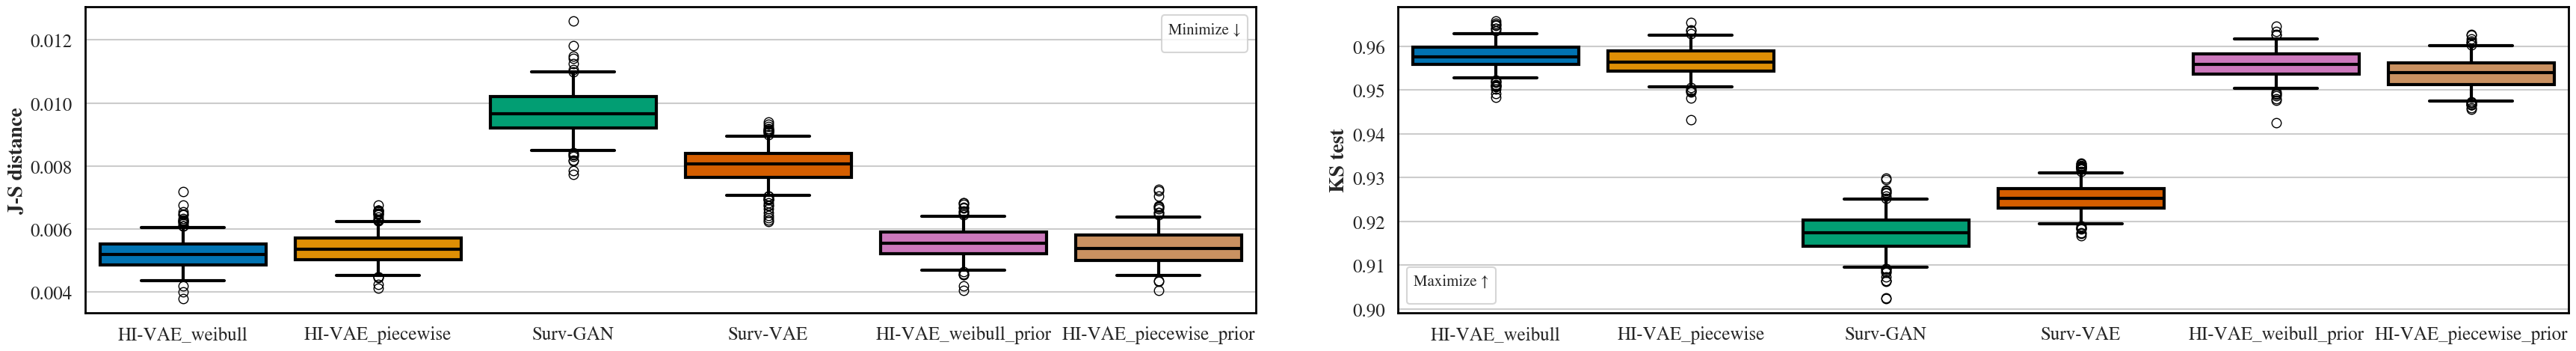

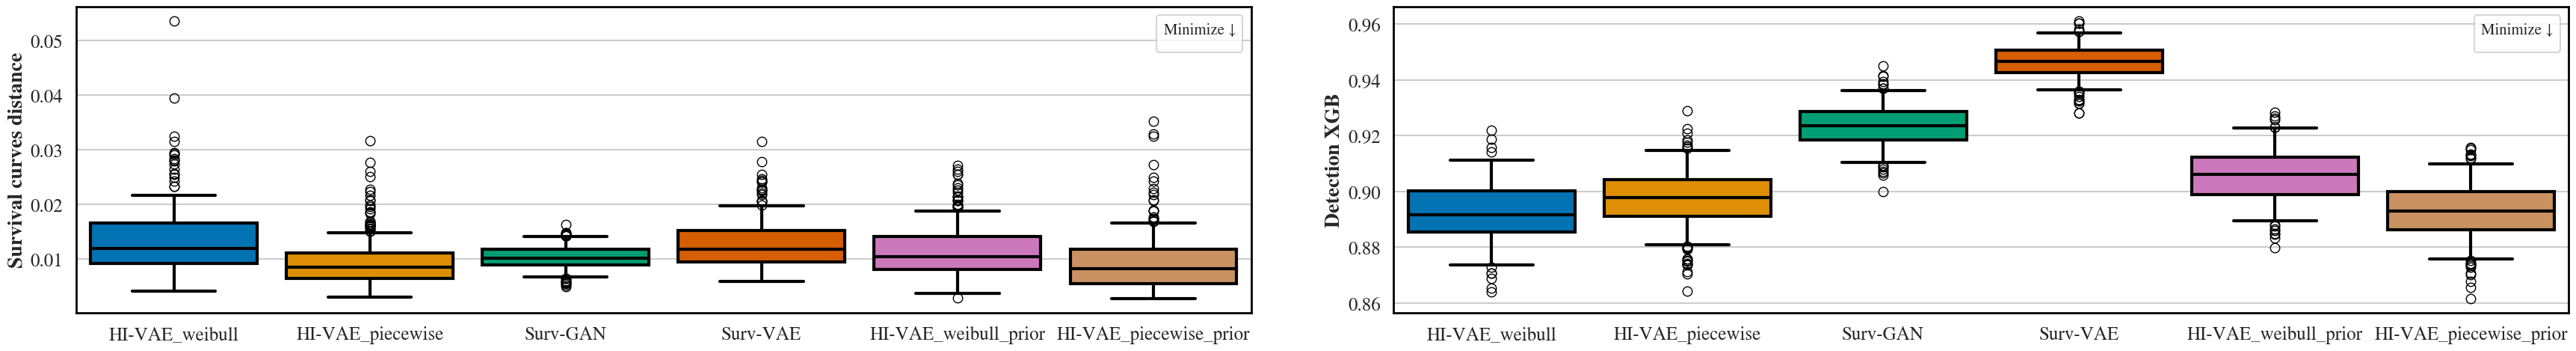

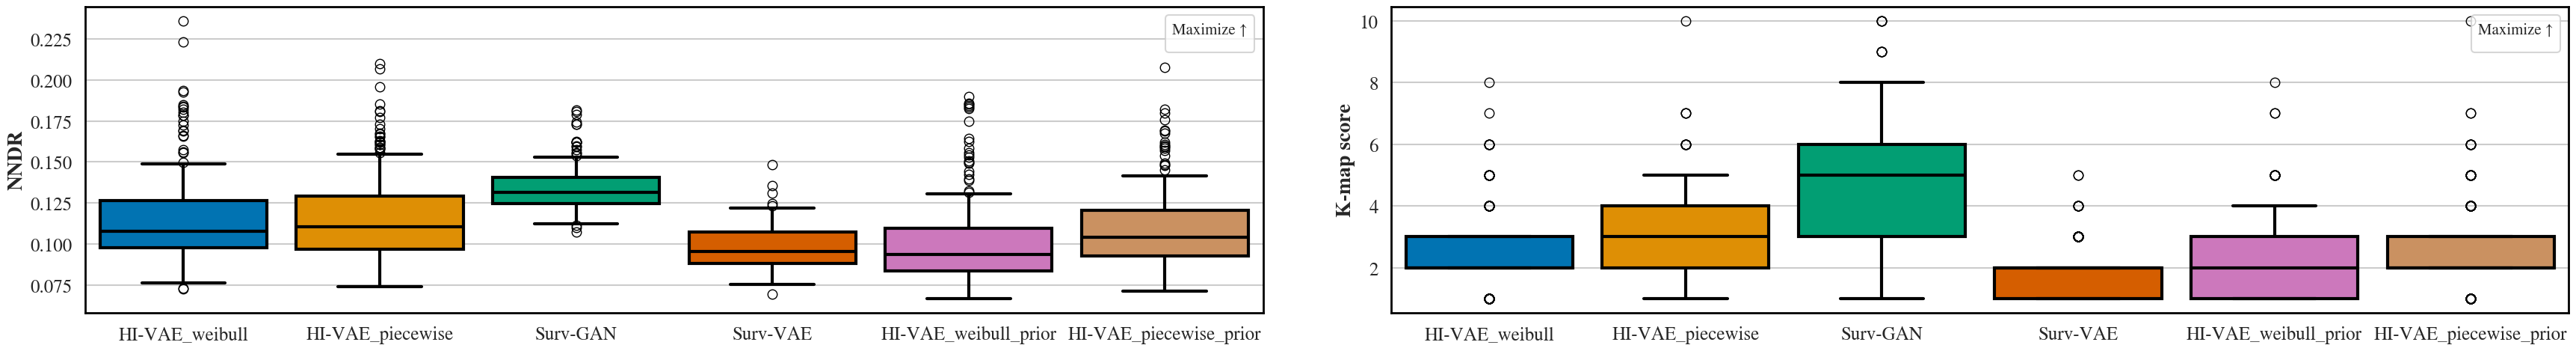

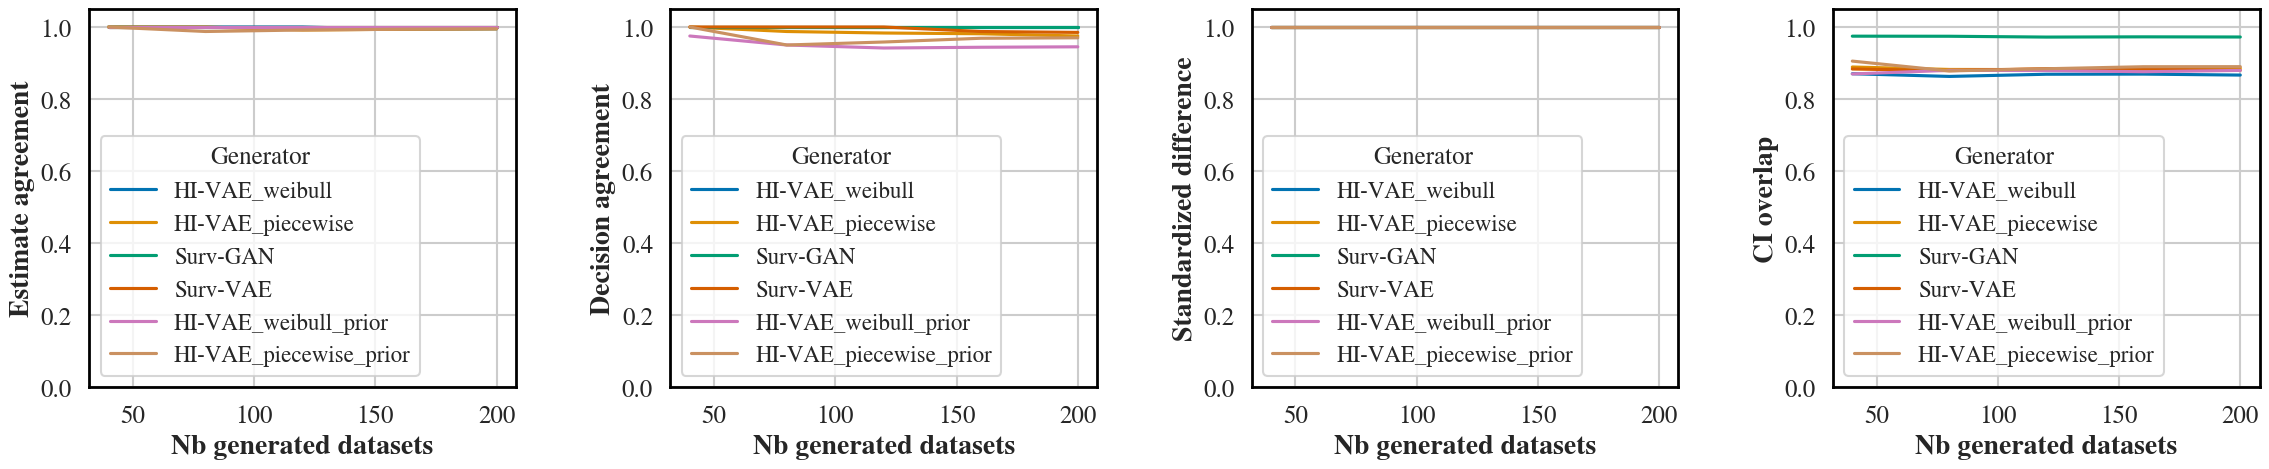

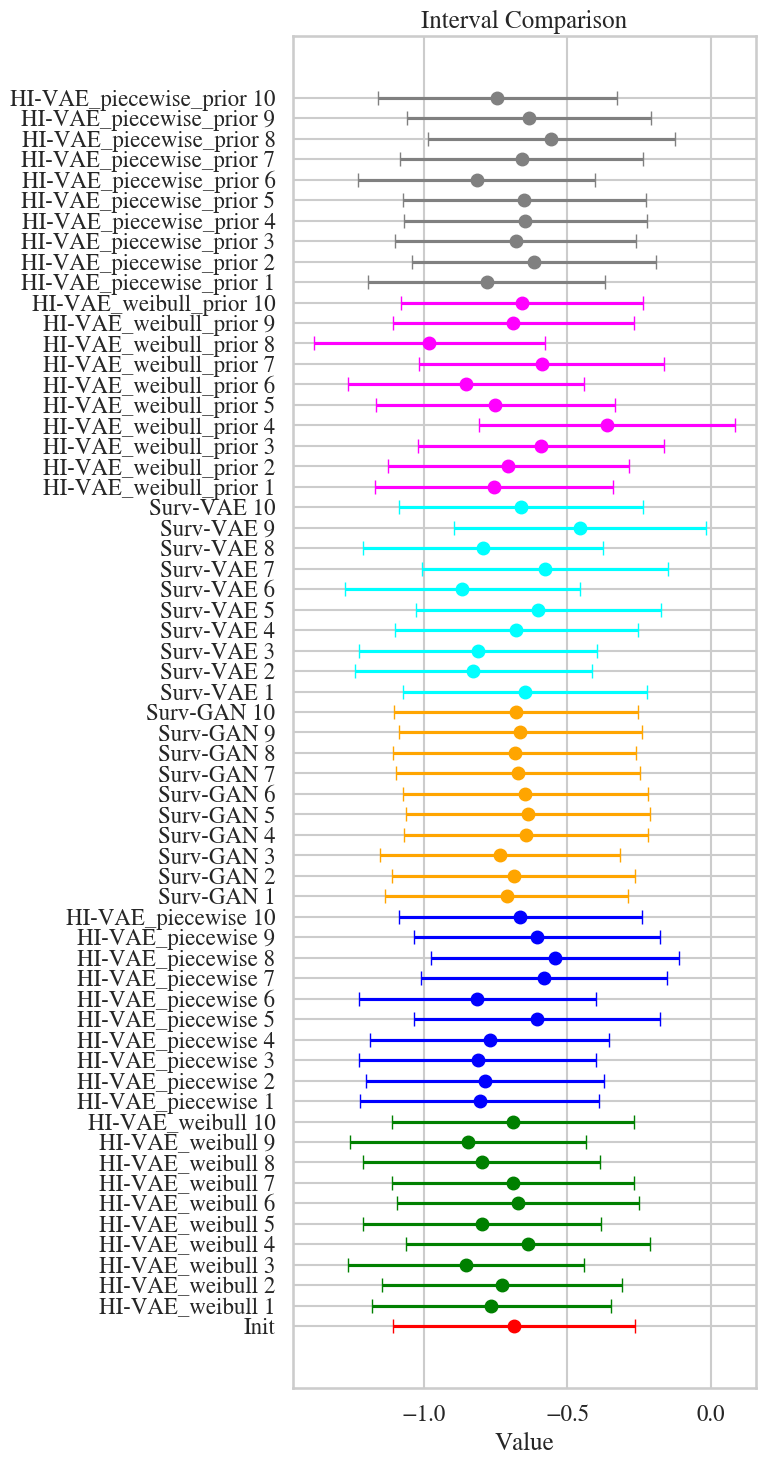

In [3]:
visualize("Aids")

# SAS_1

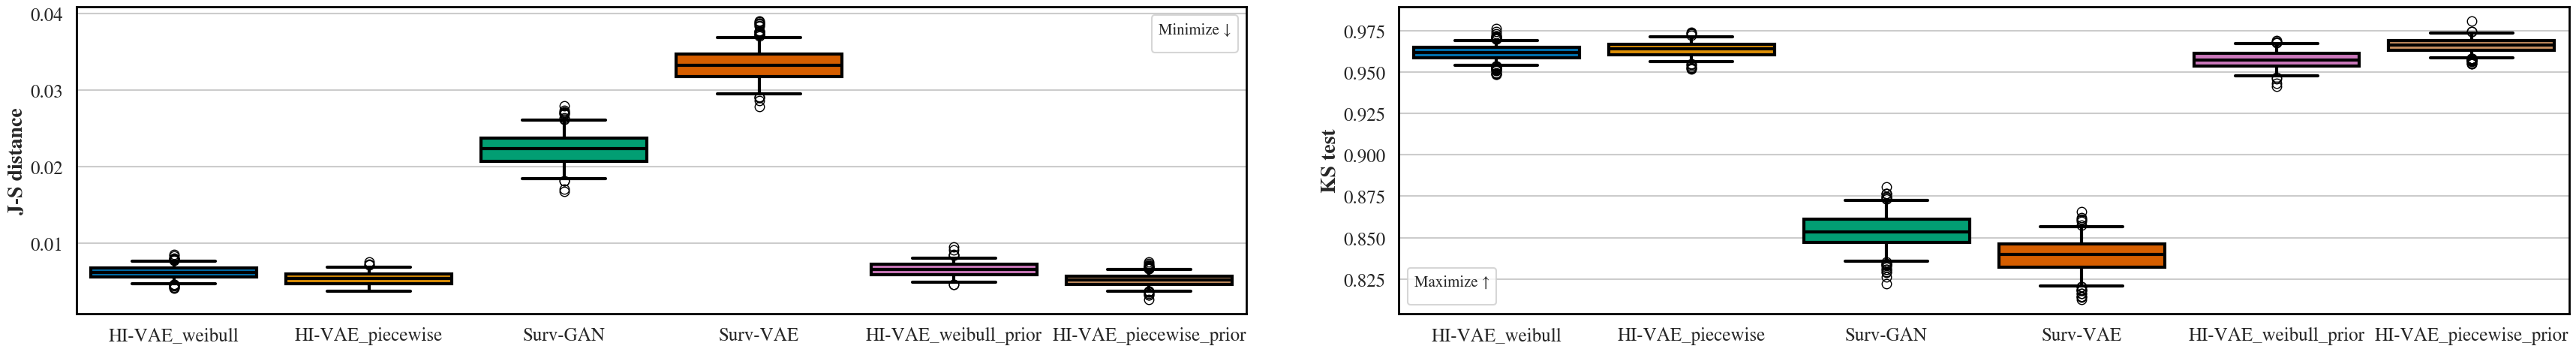

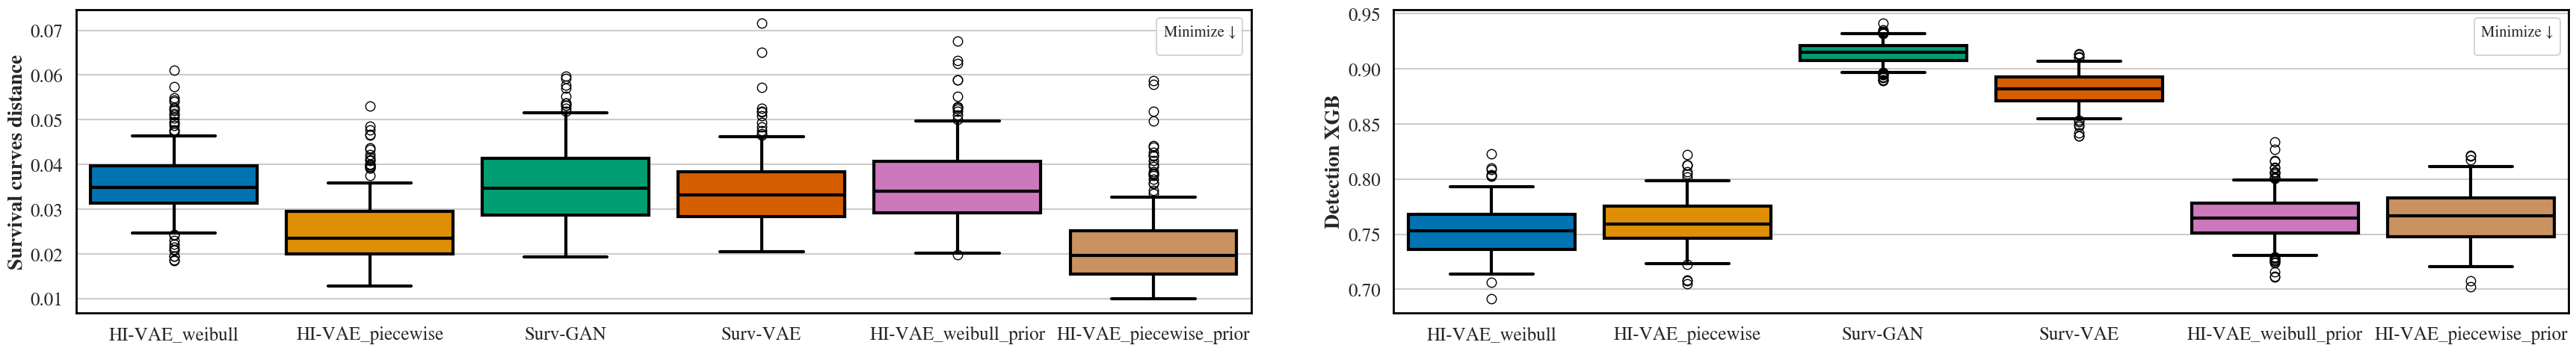

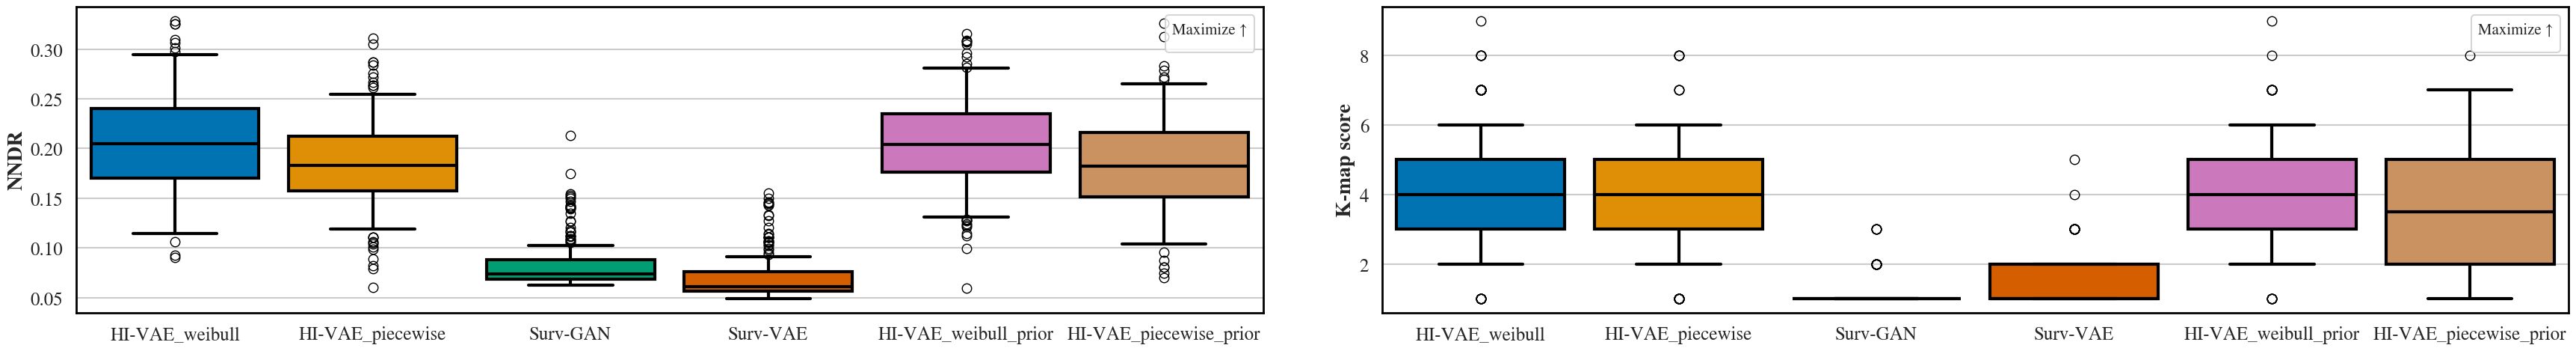

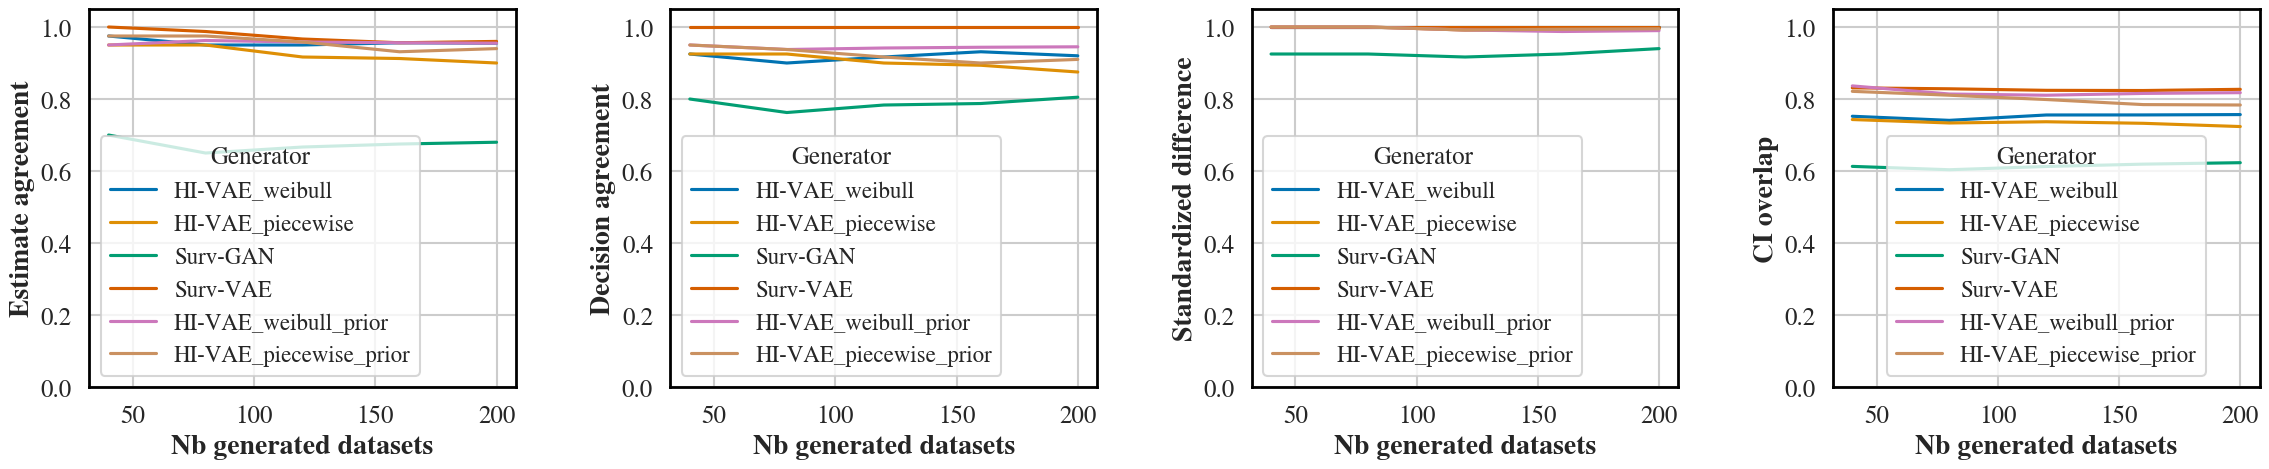

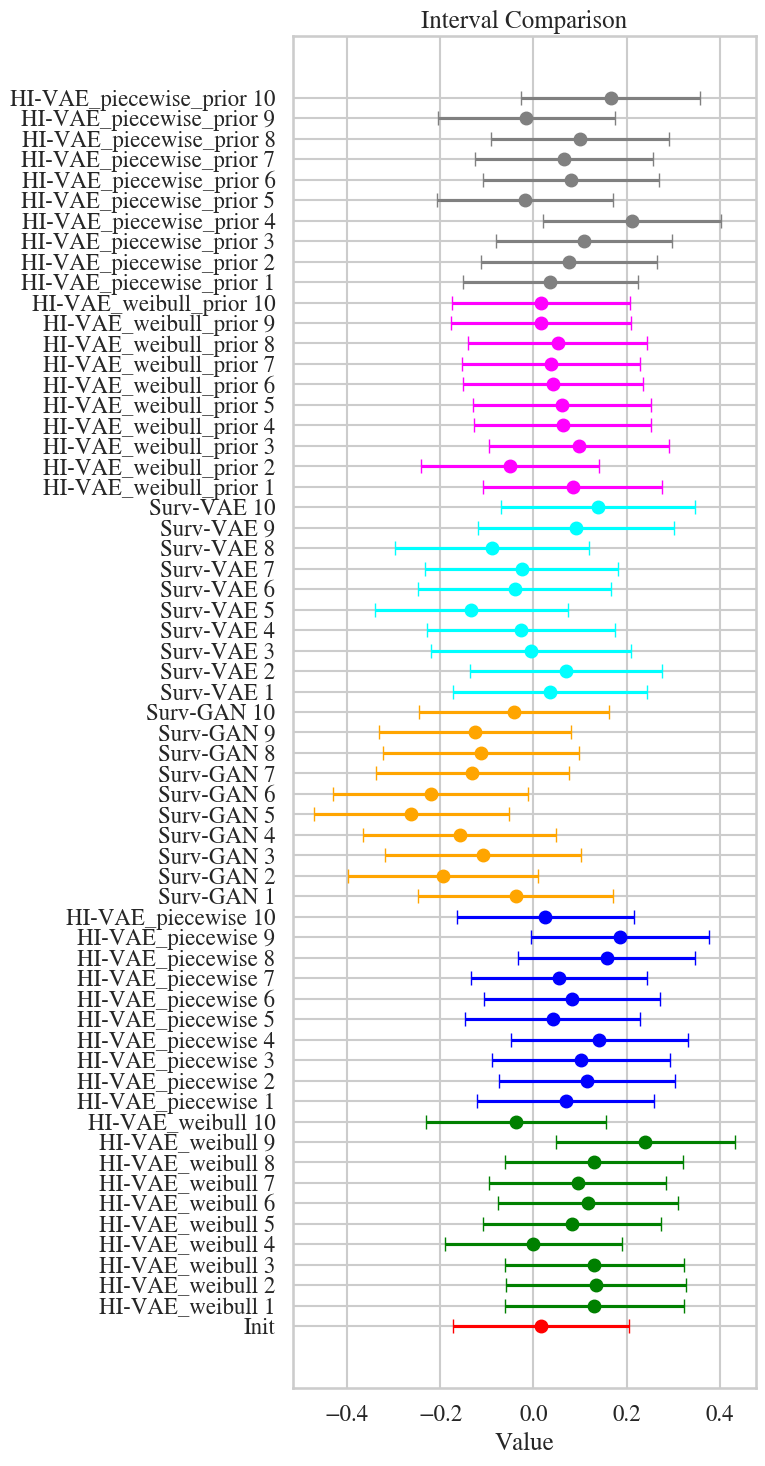

In [4]:
visualize("SAS_1")

# SAS_2

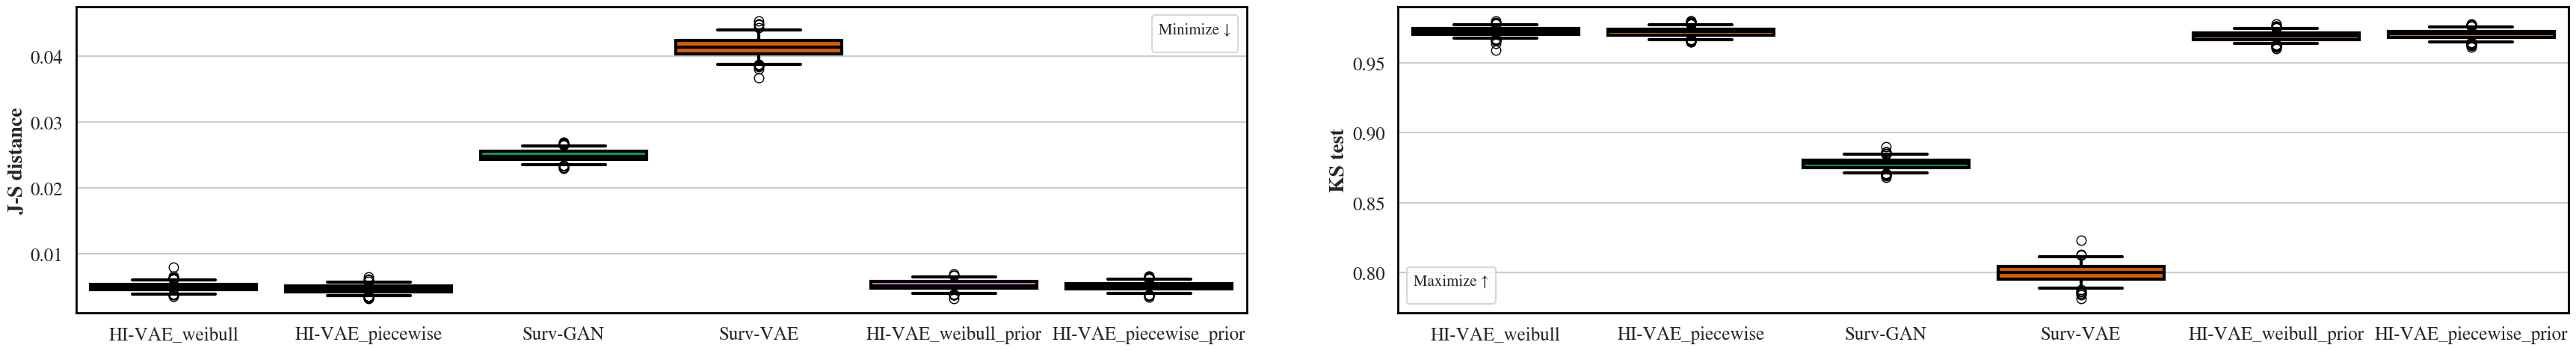

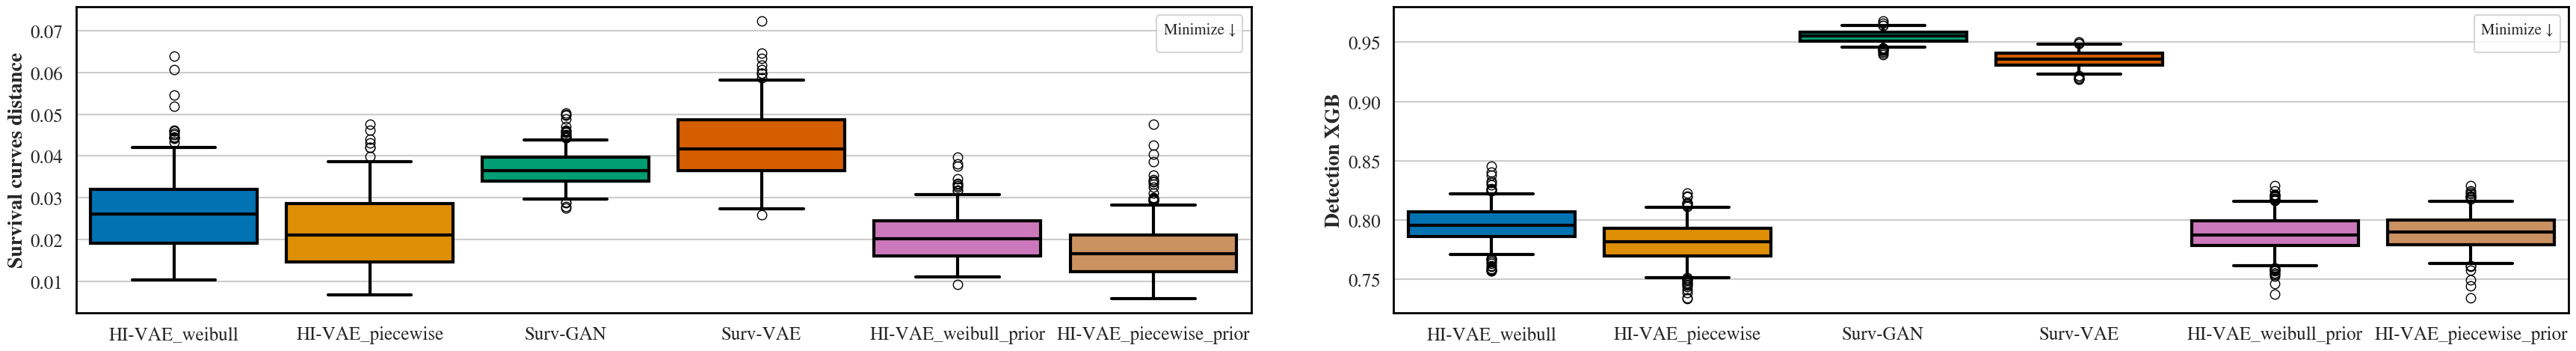

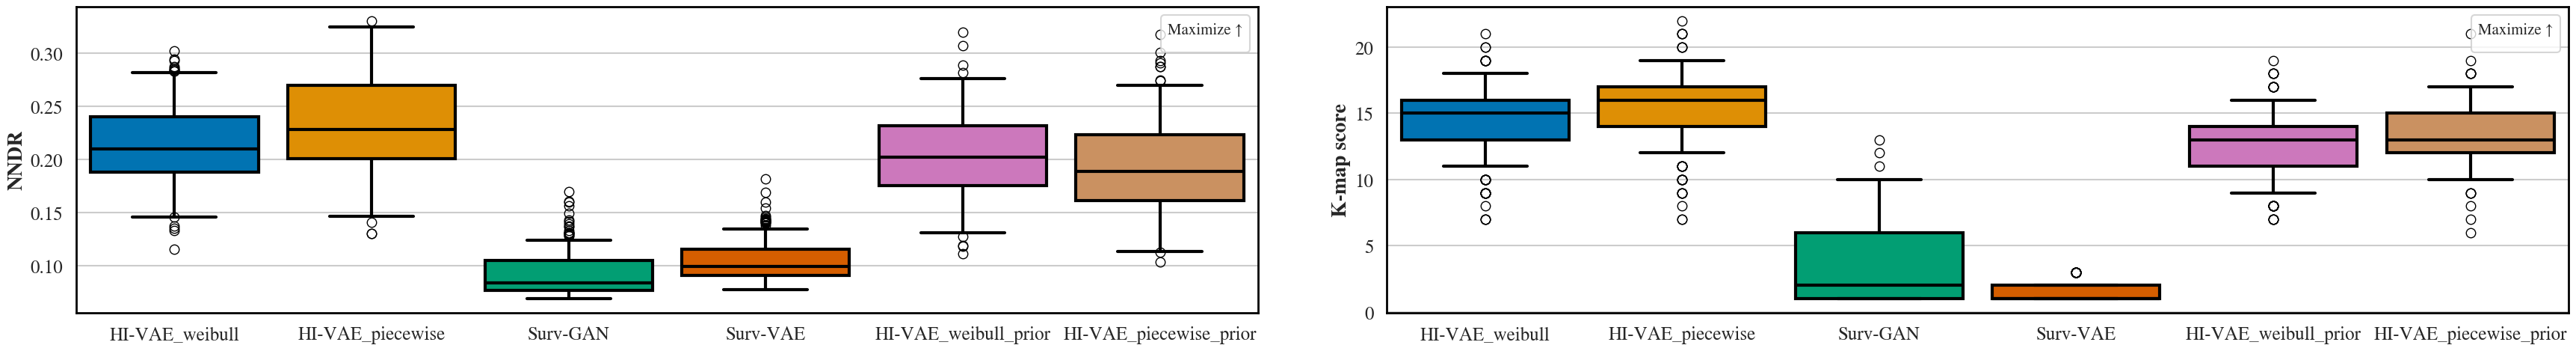

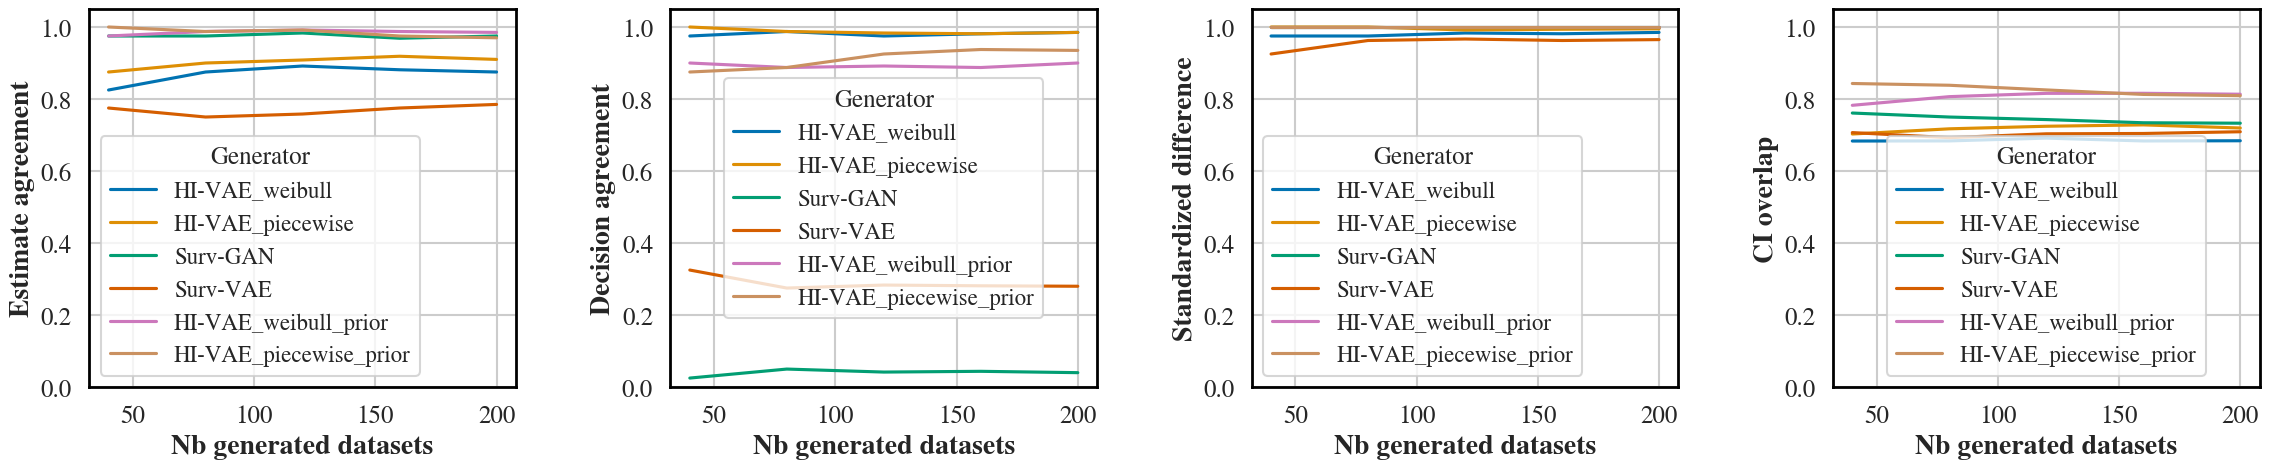

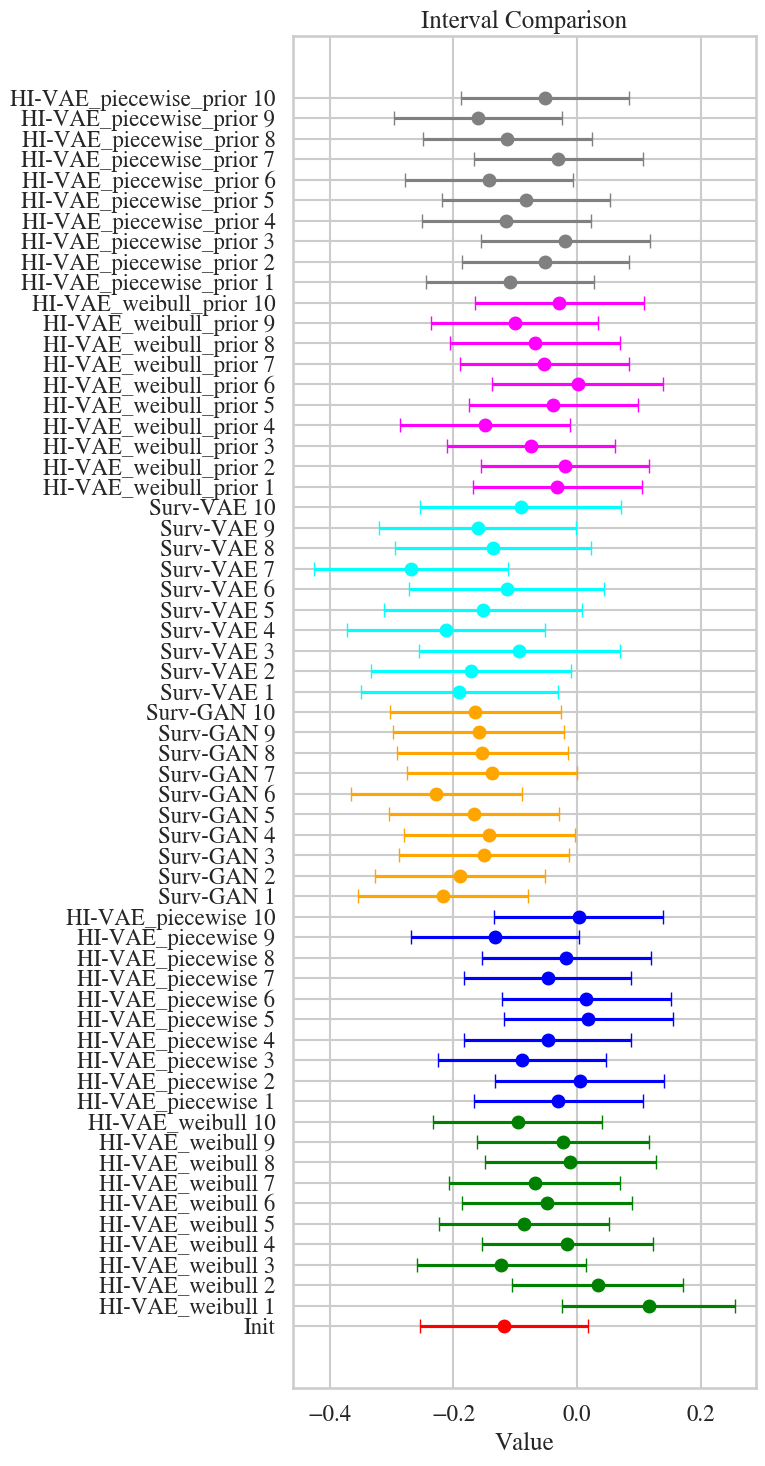

In [5]:
visualize("SAS_2")

# SAS_3

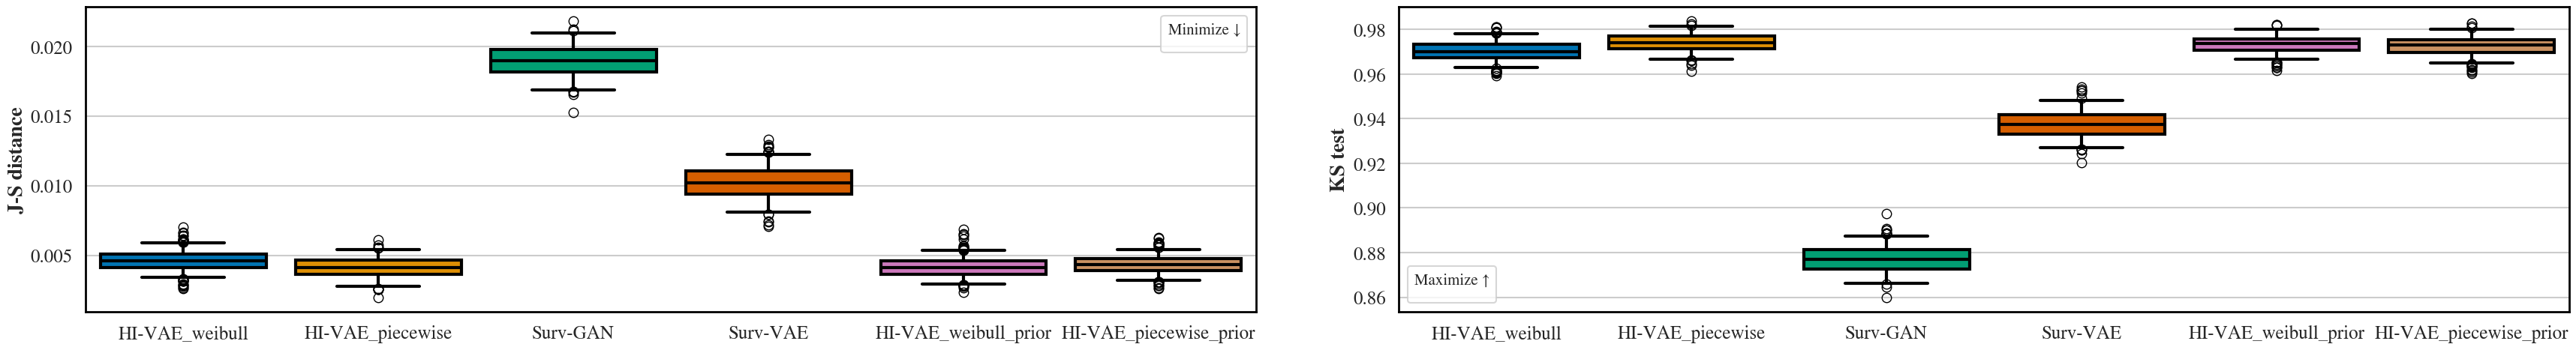

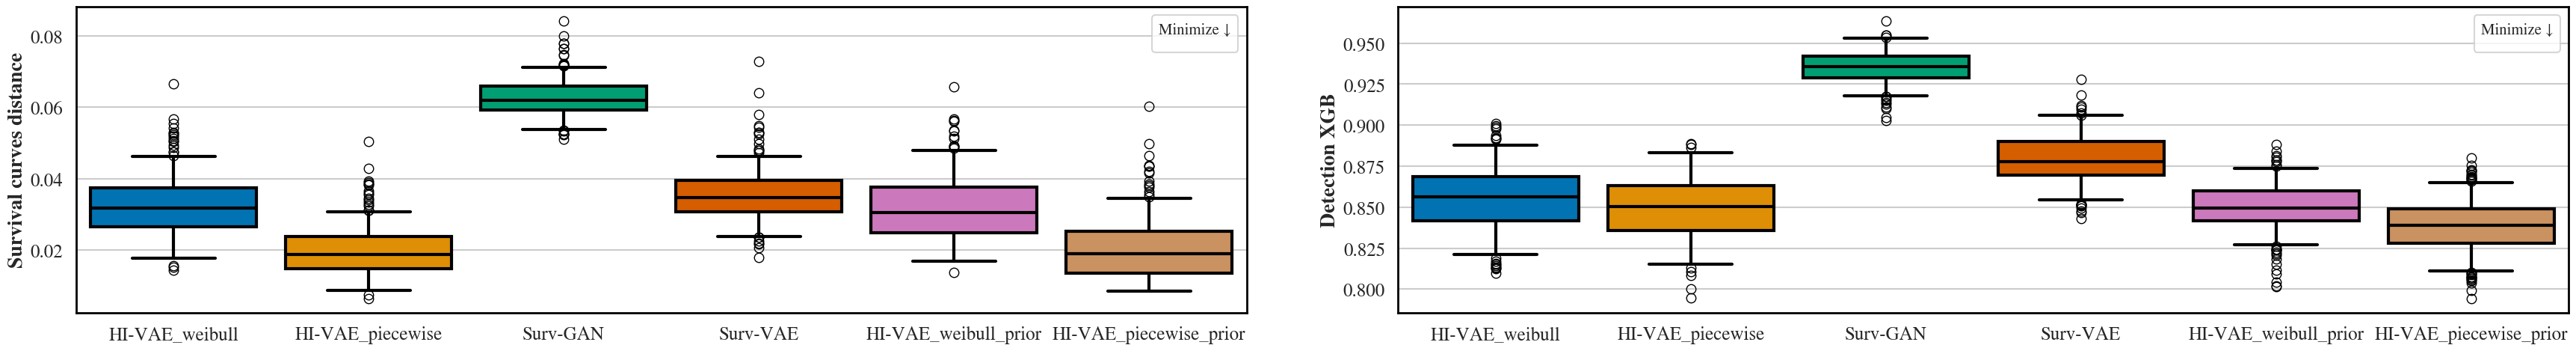

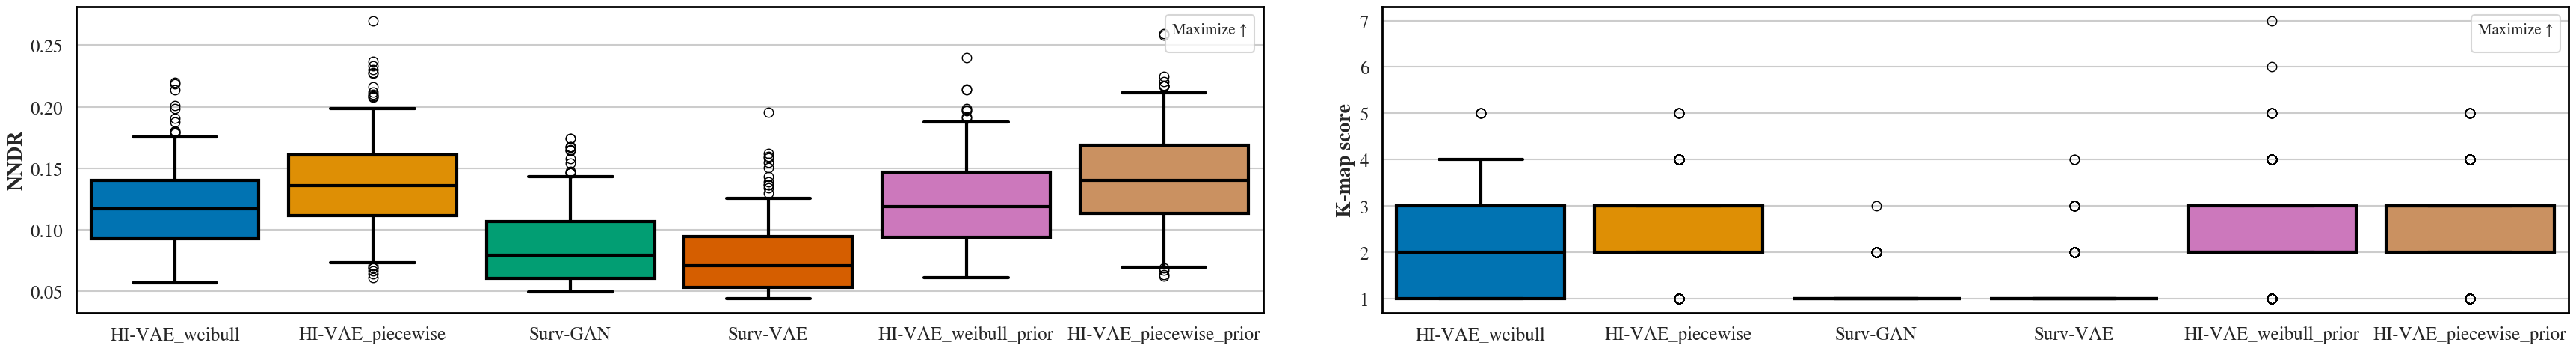

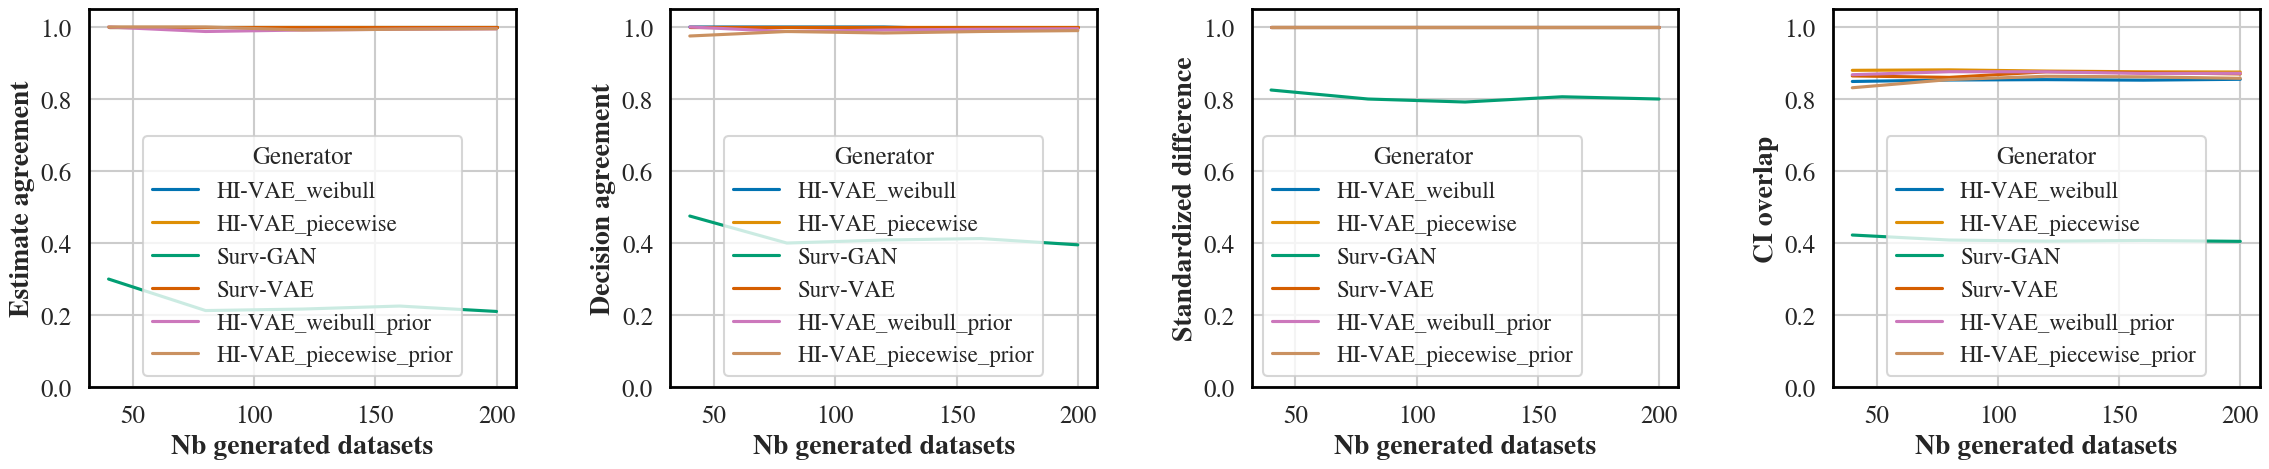

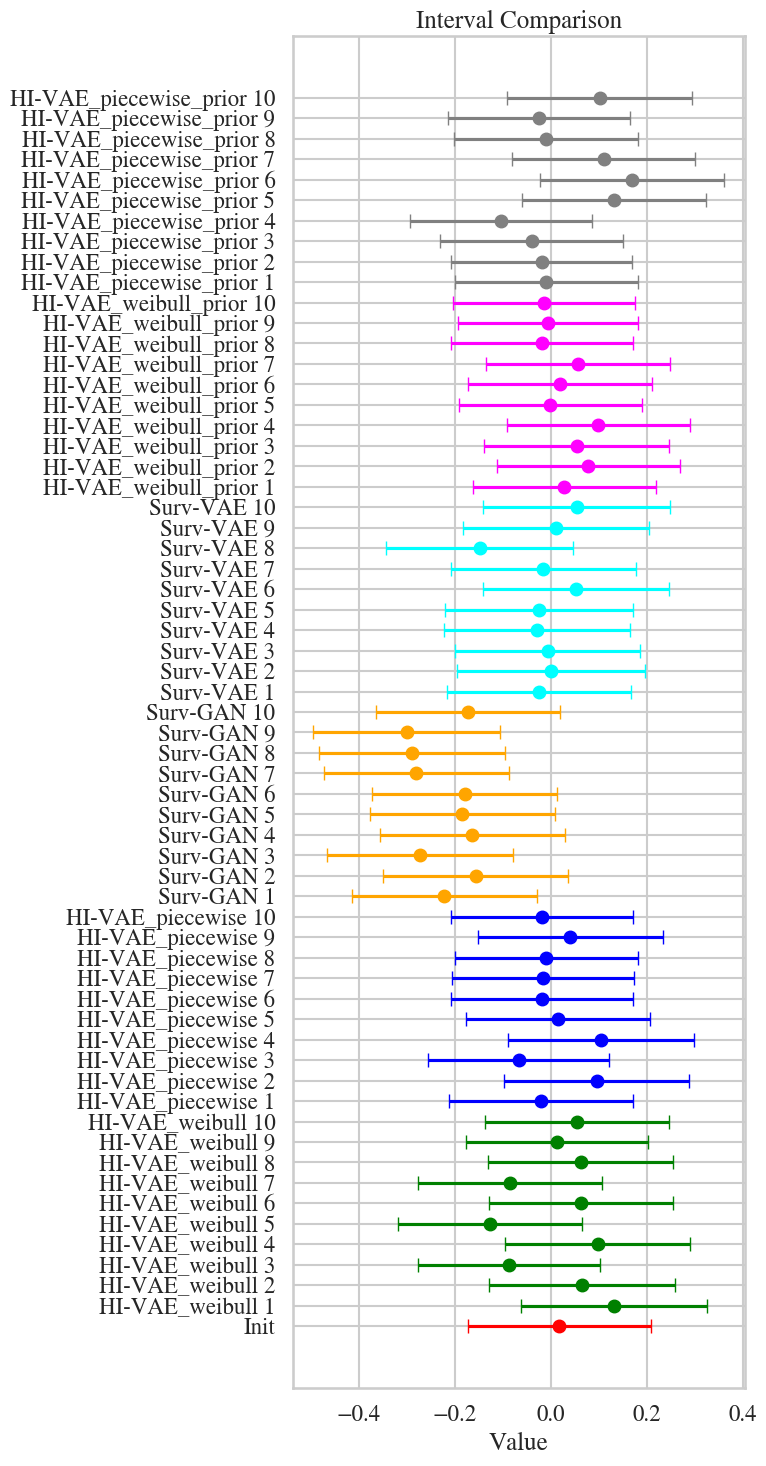

In [6]:
visualize("SAS_3")